<a href="https://colab.research.google.com/github/PankajRaghunadhabhatla/LLM-Engineering-Udemy_Edward/blob/main/Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.0 MB/s eta 0:00:00


In [ ]:
#Imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
#Sentiment Analysis
classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("I am super excited to be on my way to LLM Mastery")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993057250976562}]


In [ ]:
#Named entity recognition
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama as the 44th president of the United States")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': 0.99906945, 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.9985615, 'word': 'United States', 'start': 42, 'end': 55}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
#Question Answering with Context

question_answer = pipeline("question-answering", device="cuda")
result = question_answer(question = "Who was the 44th president of the United States", context= "Barack Obama was the 44th President of the United States")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.981872022151947, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [ ]:
#Question Answering with Context

text = """ The Hugging Face transformer library is an incredible versatile powerful tool for natural language processing.
It allows users to perform all the tasks as text classification, question and answering, among others.
Its an extremely popular library. Convenient way to work with transformers """

question_answer = pipeline("question-answering", device="cuda")
result = question_answer(question = "What is a powerful natural language processing tool", context= text)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.8459439873695374, 'start': 1, 'end': 37, 'answer': 'The Hugging Face transformer library'}


In [ ]:
#Text Summarization
summarizer = pipeline("summarization", device='cuda')
text = """ The Hugging Face transformer library is an incredible versatile powerful tool for natural language processing.
It allows users to perform all the tasks as text classification, question and answering, among others.
Its an extremely popular library. Convenient way to work with transformers """
summary = summarizer(text, max_length=50, min_length=14, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 Hugging Face transformer library is an incredible versatile powerful tool for natural language processing . It allows users to perform all the tasks as text classification, question and answering, among others .


In [ ]:
#Translation
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The data scientists are truly excited about the power and simplicity of Hugging Face pipeline API")
print(result)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'translation_text': 'Les chercheurs en données sont vraiment enthousiastes de la puissance et de la simplicité de l’API du pipeline Hugging Face'}]


In [ ]:
#Classification
classifier = pipeline("zero-shot-classification" ,device="cuda")
result = classifier(
    "Hugging Faces transformer library is amazing",
    candidate_labels=["technology", "politics", "sports"]
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


{'sequence': 'Hugging Faces transformer library is amazing', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9820617437362671, 0.011280330829322338, 0.0066579412668943405]}


In [ ]:
# Text Generator
generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using Huggice Face's pipelines, it's")
print(result[0])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


{'generated_text': "If there's one thing I want you to remember about using Huggice Face's pipelines, it's that they work very much like real-life pipelines in the case of any program. These pipelines will be designed on the user-defined interface of"}


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

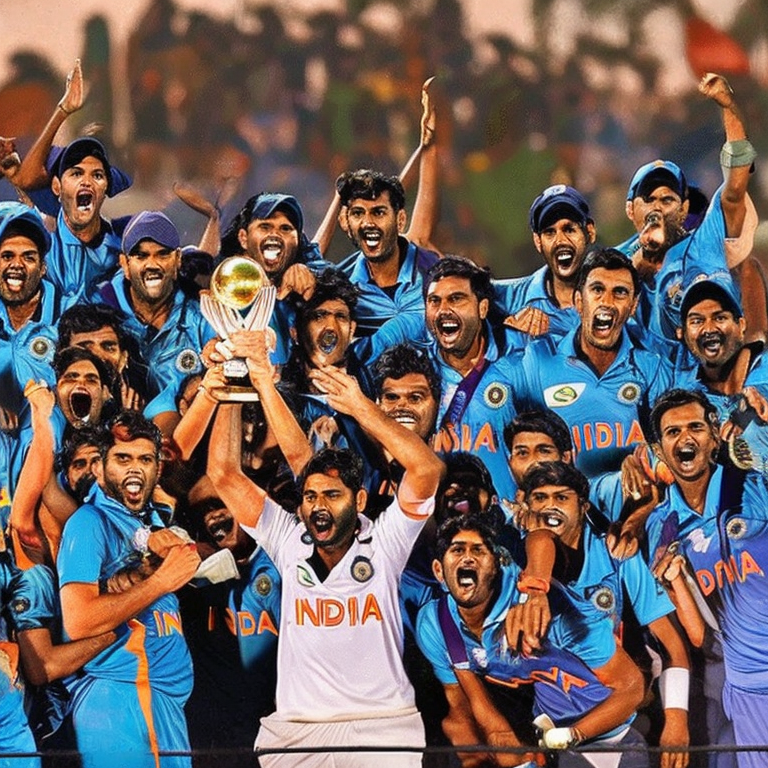

In [ ]:
#Image generation
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype = torch.float16,
    use_safetensors = True,
    variant = "fp16"
).to("cuda")

text = "India winning word cup, in a cricket field which is spooky"
image = image_gen(prompt=text).images[0]
image

In [ ]:
#Audio Generation

synthesizer = pipeline("text-to-speech", "microsoft/speecht5_tts", device="cuda")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7304]["xvector"]).unsqueeze(0)

speech = synthesizer("hi to any artificial intelligence engineer, on the way to mastery!", forward_params = {"speaker_embeddings": speaker_embedding})

sf.write("speech.wav",speech["audio"], samplerate = speech["sampling_rate"])
Audio("speech.wav")

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

cmu-arctic-xvectors.py:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]